In [1]:
import pandas as pd
import numpy as np

import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [4]:
data.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [5]:
def remove_punctuation(text):
  return [word for word in text if word.isalpha()]

def remove_punctuation_from_word(text):
  token = []
  for word in text:
    if word[-1].isalpha():
      token.append(word)
    else:
      token.append(word[:-1]) 
  return token

stop_words = stopwords.words('english')
def remove_stopword(text):
  return [w for w in text if not w in stop_words]
    
def lemmatizing(text):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word) for word in text]

In [6]:
def preprocessText(raw_text):
    processed_text = data[raw_text]

    print('Converting to lower case...')
    processed_text = [text.strip().lower() for text in processed_text]
    print('Done')

    print('Tokenizing...')
    processed_text = [word_tokenize(text) for text in processed_text]
    print('Done')

    print('Removing punctuation...')
    processed_text = [remove_punctuation(text) for text in processed_text]
    processed_text = [remove_punctuation_from_word(text) for text in processed_text]
    print('Done')

    print('Removing Stop words...')
    processed_text = [remove_stopword(text) for text in processed_text]
    print('Done')

    print('Lemmatizing...')
    processed_text = [lemmatizing(text) for text in processed_text]
    
    processed_text = [' '.join(text) for text in processed_text]
    
    print('Text pre-processing Done, ', raw_text, '\n')
    return processed_text

In [7]:
data['processedText'] = preprocessText('text')

Converting to lower case...
Done
Tokenizing...
Done
Removing punctuation...
Done
Removing Stop words...
Done
Lemmatizing...
Text pre-processing Done,  text 



In [8]:
data.head()

,ID,text,label,processedText
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,feel better dieam happy
1,9JDAGUV3,Why do I get hallucinations?,Drugs,get hallucination
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,stresseed due lack financial support school
3,6UY7DX6Q,Why is life important?,Suicide,life important
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,could helped go depression


In [9]:
def label_with_wordcloud(row):
  word_cloud = WordCloud(max_words=5, background_color='white').generate(data['processedText'][row])
  plt.figure(figsize=(5,5),facecolor = 'white', edgecolor='blue')
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()
  print(data['label'][row])
  print(data['text'][row])

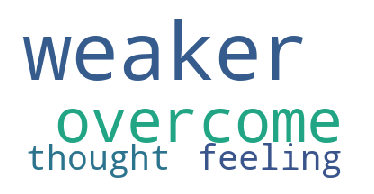

Depression
How do I overcome the feeling of being  weaker and weaker in thoughts


In [10]:
label_with_wordcloud(185)

In [41]:
X = data.processedText

In [42]:
y = data.label

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Alcohol       0.94      0.79      0.86        43
  Depression       0.75      0.99      0.85        95
       Drugs       1.00      0.55      0.71        22
     Suicide       0.91      0.40      0.56        25

    accuracy                           0.81       185
   macro avg       0.90      0.68      0.74       185
weighted avg       0.84      0.81      0.80       185



In [46]:
y_proba = sgd.predict_proba(X_test)
log_loss(y_test, y_proba)

0.6619427140295318

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm = LinearSVC()


model = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', CalibratedClassifierCV(svm) ),
               ])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Alcohol       0.82      0.86      0.84        43
  Depression       0.82      0.96      0.88        95
       Drugs       1.00      0.68      0.81        22
     Suicide       0.79      0.44      0.56        25

    accuracy                           0.83       185
   macro avg       0.86      0.74      0.77       185
weighted avg       0.84      0.83      0.82       185



/Users/kamalshubhamyadu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [48]:
y_proba = model.predict_proba(X_test)
log_loss(y_test, y_proba)

0.5317240358260854

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('xgb', XGBClassifier(eval_metric="logloss", eval_set=eval_set, verbose=True) ),
               ])

eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Alcohol       0.82      0.77      0.80        43
  Depression       0.77      0.97      0.86        95
       Drugs       0.92      0.55      0.69        22
     Suicide       0.83      0.40      0.54        25

    accuracy                           0.79       185
   macro avg       0.84      0.67      0.72       185
weighted avg       0.81      0.79      0.78       185



In [51]:
y_proba = xgb.predict_proba(X_test)
log_loss(y_test, y_proba)

0.574673590444129